# Statistiques et Python

## Anlayse exploratoire de données

Explorer la data est une étape crucriale dans l'analyse de données.<br>
On appelle cette discipline l'analyse exploratoire de données" et elle a été inventée par un statisticien du nom de "John Tukey".

John Tukey a imaginé l'analyse exploratoire de données comme la porte d'entrée de l'analyse de données qui ne consiste pas à présenter une réalité absolue de la donnée mais qui sert de base à toute analyse qui sera réalisée sur le dataset.<br>



Dans chaque analyse de données il convient d'analyser les distributions de chaque variable, la répartition des valeurs et leur fréquence.

Par exemple les moments statistiques, ainsi que les quantiles sont des informations très précieuses.

**Quelle librairie utiliser?**

De nombreuses librairies de visualisation peuvent être utilisées en Python.
Matplotlib est la plus connue, seaborn en est une déclinaison plus puissante. Plotly est une librairie également très puissante.

https://matplotlib.org/

https://seaborn.pydata.org/

https://plotly.com/

### A. Analyse exploiratoire graphique

### A.1. L'histogramme & le binning

Le binning (bucketing) consiste à créer des tranches de valeurs afin de regrouper une variable continue et de pouvoir analyser les valeurs à travers les groupes crées. 
On appelle cela la discrétisation car on transorme une variable à valeurs continues en variable à valeur discrète.

Pour réaliser ce binning, la méthode de la racine carré est une des méthodes la plus utilisée.

**Méthode de la racine carré:**

Consiste à choisir un nombre de groupe = à la racine carré du nombre de valeurs contenues dans la variable.

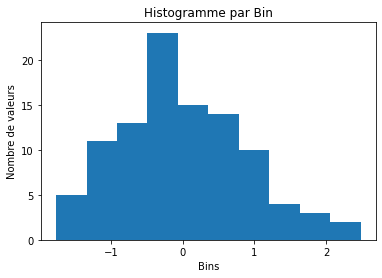

In [17]:
#Exemple

#importation des librairies qui seront utilisées
import numpy as np
import matplotlib.pyplot as plt

#
my_array = np.random.randn(100) # Création d'un tableau avec 100 élements aléatoire
square_root_method = int(np.sqrt(len(my_array)))
_ = plt.hist(my_array, bins=square_root_method)
_ = plt.xlabel('Bins')
_ = plt.ylabel('Nombre de valeurs')
_ = plt.title('Histogramme par Bin')
plt.show()

### A.2. Le 'bee swarm plot' ou le diagramme en accordéon

Le diagramme en accordéon permet de visualiser l'ensemble des données lorsqu'elles sont définies par catégories.
C'est un outil puissant de visualisation.

In [19]:
#Exemple
import seaborn as sns #nous utilisons seasborn pour modéliser le diagramme

sns.set_theme()
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Nous souhaitons afficher les pourboires par sexe:

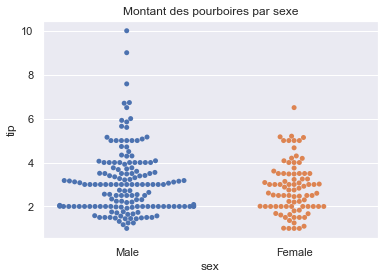

In [25]:
ax = sns.swarmplot(x='sex', y='tip', data=tips).set_title('Montant des pourboires par sexe')

Nous pouvons voir assez clairement la répartition de nos distirbutions sur cette forme de diagramme.
Nous voyons:
    * Le max et le min
    * La fréquence pour chaque valeur, 
    * La comparaison entre chaque élement de catégorie, içi le sexe
    
Limites: 
    * dans le cas de données massives les données peuvent se chevaucher et nous perdons la lisibilité et l'interêt du diagramme. On parle 'd'overlapping'.<br>
 Dans ce cas on lui préferera le boxplot.

### A.3. Fonction de répartition empirique (empirical cumulative distribution function ECDF)

La fonction de répartition empirique est une fonction qui attribue la probabilité $\frac{1}{n}$ à chacun des $n$ nombres d'un échantillon.

Il en découle l'utilisation de principes mathématiques propre à une telle distribution estimée:

https://en.wikipedia.org/wiki/Empirical_distribution_function

Afin de générer un ECDF il faut que l'axe des abcisses soit la variable que l'on souhaite analyser ordonnée par ordre croissant.<br>
Il faut également que 


In [27]:
#example:
import numpy as np

sns.set_theme()
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


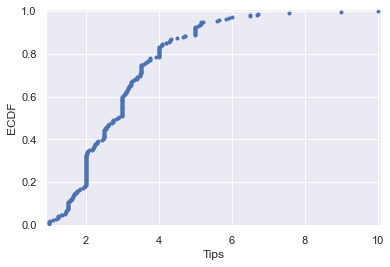

In [48]:
x_abcisse = np.sort(tips['tip'])
y_ordonnee = np.arange(1, len(x_abcisse)+1) / len(x_abcisse)

_ = plt.plot(x_abcisse, y_ordonnee, marker='.', linestyle='none')
_ = plt.xlabel('Tips')
_ = plt.ylabel('ECDF')
plt.margins(0.01) #evite d'avoir des points qui sortent
plt.show()

**Interpréter cette courbe:**
    
Nous pouvons par exemple lire que 20% des pourboires données sont < 2 et que de 20% à 35% les pourboires sont les mêmes: 2 soit plus d'1/3 des pourboires sont <= 2.

Cette courble est un outil puissant de visualisation des données pour se familiariser avec un set dans le cadre d'une analyse exploratoire de données.

A noter qu'il est possible de plot plusieurs courbles à la fois afin de visualiser plusieurs catégories. Comme pour les hommes et les femmes, en succédant plusieurs plt.plot.

### B. Analyse exploratoire quantitative

Les méthodes graphiques sont de puissants outils visuels mais ne sont pas suffisant.
Il est nécessaire ce calculer certaines valeurs mathématiques afin d'avoir une représentation précise de nos données.



### B.1 Moyenne &  médiane, marqueur de tendance centrale d'une distriibution

**La moyenne** est un outil très intéressant mais n'est pas robuste car soumis à la proportion que les outliers peuvent prendre dans un échantillon.

**La médiane** est plus robuste que la moyenne, s'avère très intéressante pour obtenir une idée de la tendance centrale  et n'est pas influencée par les valeurs extrêmes.<br> 

Cependant la médiane ne donne aucune indication de la forme de la distribution.


### B.2 Percentiles, outliers et box plot

Les percentiles sont les valeur de la variable qui divise le set en groupes. Le 25eme percentile coupera la distribution en deux. Une partie avec 25% des valeurs en dessous et 75% en dessus.

Les percentiles sont en lien avec l'ECDF que nous avons vu.<br>
En effet, moyennant une expression du percentile en valeur comprise entre 0 et 1 nous pouvons afficher sur l'ECDF les percentiles souhaités .

Un outil statistique puissant de visualisation est le box plot, ou le diagramme à moustache.

En effet, Celui ci permet de visualiser:
* les quartiles représentés par la barre haute et basse du rectangle,
* la médiane représentée par un barre horizontale,
* les minimum et maximum théorique attendu Q3 +1.5*IQR ou Q1 -1.5*IQR, avec IQR =écart interqartile.
* Les outliers représentés par des points au delà ou en deça des moustaches.

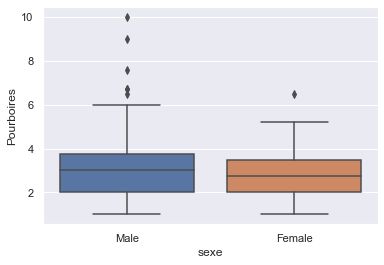

In [51]:
#exemple

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
tips = sns.load_dataset("tips")

_ = sns.boxplot(
    x='sex',
    y='tip',
    data=tips)

# Label the axes
_ = plt.xlabel('sexe')
_ = plt.ylabel('Pourboires')


# Show the plot
plt.show()


On remarque donc les élements mentionnés plus haut. On voit que la distribution des pourboires payés par les hommes comportent plus d'outliers que celle des pourboires payés par les femmes.
On constate une distribution principale Min à Max et IQS assez identique. Ce qui différencie les deux distributions est le nombre et la valeur des outliers.

### B.3 Variance et écart type(standard deviation: std)

Les valeurs centrales de distribution ne nous permettent pas de connaitre l'étendue et la variabilité des données.
La variance est le carré de la moyenne des écarts à la moyenne. 

C'est pourquoi nous utilisons plutôt l'écart type lors d'une analyse, qui est la racine carré de la variance et qui exprime ce qu'exprime la variance mais dans la même unité que celle de la variable étudiée.

### B.4 Covariance et le coefficient de Pearson

Un outil graphique puissant est le scatter plot ou le nuage de point.

Cet outil nous permet d'analyser la distribution de deux variables et de constater comment elles évoluent entrs elles dans le set de données, autrement dit comment elles sont correlées.

**La covariance** est un indicateur de corrélation. C'est la somme des produits des écarts à la moyenne des deux variables, divisé par la taille de l'échantillon.

Si la covariance est positive ou négative alors les deux variables sont correlées et évoluent dans le même sens ou dans un sens contraire.

**Le coefficient de Pearson** est la covariance / le produit des écarts types des deux variables.

Le coefficient de Pearson n'a pas d'unité. Lorsqu'il est proche de 0 les deux variables ne sont pas du tout corrélées et plus il est proche de 1 ou -1, plus elles le sont.

In [8]:
#example:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


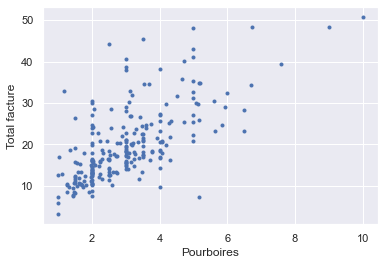

In [9]:
_ = plt.plot(tips['tip'], tips['total_bill'], marker='.', linestyle='none')


# Label the axes
_ = plt.xlabel('Pourboires')

_ = plt.ylabel('Total facture')


# Show the result
plt.show()

Nous constatons que les variables sont relativement correllées positivement.<br>
Nous pouvons le constater en calculant le coefficient de Pearson et la covariance.

La covariance en python est appellée la matrice de covariance car il en retourne un array à deux dimensions où nous voyons apparaitre les covariances et les variances des deux variables.<br>

In [11]:
#covariance
np.cov(tips['tip'], tips['total_bill'])

array([[ 1.91445464,  8.32350163],
       [ 8.32350163, 79.25293861]])

On constate:
   * variance variable 'tip' = 1.9
   * variance variable 'total_bill' = 79.25
   * covariance = 8.32

In [13]:
#Coefficient de Pearson:
np.corrcoef(tips['tip'], tips['total_bill'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

Nous constatons un r (coefficient de Pearson) de 0.68 indiquant le degrés de corrélation des deux variables.<br>
à noter que les indices [0,0] et [1,1] de ce tableau à deux dimensions qui est renvoyé par python est toujours de 1. Cela est logique puique le calcul est réalisé à partir de la matrice de covariance et qu'à ces indices ce sont les variances de chaque variable qui y sont présente.

-----------------------------

## Logique probabiliste et statistique inférentielle

Les statistiques inférentielles nous permette d'étendre une analyse d'un échantillon à une population dont il a été extrait.

Grâce à ces outils nous pourrons établir des probabilités pour une population donné à partir d'un échantillon.

## Probabilités

Afin de simuler des experiences aléatoires, nous utilisons le module random de numpy.<br>

Par ailleurs nous utilisons la méthode .seed() afin de 'stabiliser' les expériences aléatoires en python car à chaque exécution du code, de nouvelles valeurs sont generées. Il peut être nécessaire de conserver une suite de valeurs generées. C'est ce pourquoi nous utilisons .seed()

En programmation les nombres aléatoires sont generés à partir de nombre très grand, la graine (seed) défini un même nombre pour le calcul des exeriences aléatoires ce qui entraine une génération de nombre identiques.


### Bernoulli trial: schéma de Bernoulli

Un schéma de Bernoulli et une répétition d'experience aléatoire dont les issus possibles sont binaires (succès ou défaite) et chaque issu possible à une probabilité associé.


L'exemple le plus parlant et le plus courant est le jeu de pile ou face.<br>
Dans ce jeu, on peut soit avoir pile soit avoir face et, dans le cas d'une pièce non truquée, 50% de chance d'obtenir l'une ou l'autre de ces issues.<br>
Ceci défini un schéma de Bernoulli.

In [23]:
#example, jetté de 5 pièces de monnaie
import numpy as np

#seed du générateur de nombre aléatoire
np.random.seed(100) 

# génération de l'experience
nbr_aleatoire = np.random.random(size = 5) #generation des nombres aléatoires
nbr_aleatoire

array([0.54340494, 0.27836939, 0.42451759, 0.84477613, 0.00471886])

In [29]:
face = nbr_aleatoire > 0.5
pile = nbr_aleatoire <=0.5

In [32]:
print(f'Face: {face}, Pile : {pile}')

Face: [ True False False  True False], Pile : [False  True  True False  True]


Dans le cas où nous voulons simuler une experience plus complexe une boucle for est utilisée.

Par exemple imaginons que nous voulions simuler 5000 fois 4 lancés d'une pièce non truquée et calculer la probabilité d'obtenir 3 faces à chaque fois?

In [54]:
nbr_reussite = 0
for e in range(5000):
    face = np.random.random(size = 4) < 0.5
    if np.sum(face) == 3:
        nbr_reussite += 1

nbr_reussite / 5000   

0.2448

Chose intéressante, notez que l'on a autant de chance d'obtenir exactement 1, 2, 3 faces à chaque fois ce que l'on peut vérifier en modifiant la condition np.sum(face) == x.

La programmation est un outil très performant pour réaliser ce que l'on appelle un hacking de statistiques puisqu'il est très simple de réaliser des expériences de très grandes nombreuses de fois et en vérifier le résultat empirique.

Autre example tiré de datacamp cours 'Statistical thinking in Python 1':
Nous souhaitons savoir sur 100 prêts accordés avec une probabilité de défaut de remboursement de 0.05, combien seront non honorés.

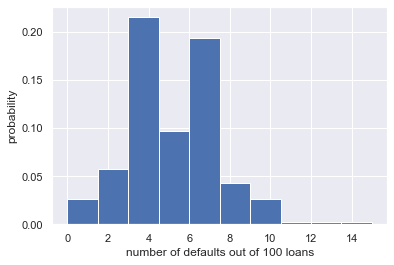

In [71]:
#Funtion bernoulli trial
def perform_bernoulli_trials(n, p):
    n_success = 0
    for i in range(n):
        randnum = np.random.random()
        if randnum < p:
            n_success += 1
    return n_success
    
np.random.seed(42) 

n_defaults = np.empty(1000)

for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)
    
n_defaults

_ = plt.hist(n_defaults, density = True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

plt.show()